In [55]:
import numpy as np
import pandas as pd

## Compute the population in each state

In [56]:
county = pd.read_csv('covid_county_population_usafacts.csv')

In [57]:
county.head(5)

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [58]:
population = county.groupby('State')['population'].sum()
population.head(5)

State
AK      731545
AL     4903185
AR     3017804
AZ     7278717
CA    39512223
Name: population, dtype: int64

## Extract the positive cases in each state from 2020-03-30 to 2020-12-27 (39 weeks)

In [74]:
from datetime import datetime
start_date = datetime(2020, 3, 30)
end_date = datetime(2020, 12, 27)
date_difference = end_date - start_date
num_weeks = (date_difference.days + 1) // 7
print("Number of weeks:", num_weeks)

0
Number of weeks: 39


In [60]:
confirmed = pd.read_csv('covid_confirmed_usafacts.csv')

In [61]:
confirmed.head(5)

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [77]:
date_range = pd.date_range(start="2020-03-30", end="2020-12-27").strftime('%Y-%m-%d').tolist()
cols = ['State'] + date_range
selected = confirmed[cols]
selected.drop_duplicates(inplace=True)
selected.head(5)

/var/folders/l2/8k3lyrk13tv35x2tjnmbkjb80000gn/T/ipykernel_97568/1930672443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected.drop_duplicates(inplace=True)


,State,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
0,AL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AL,7,7,10,10,12,12,12,12,12,...,3647,3698,3741,3780,3841,3889,3942,3990,3999,4029
2,AL,18,19,23,25,28,29,34,38,42,...,11556,11722,11827,11952,12155,12321,12521,12666,12708,12825
3,AL,0,0,0,0,1,2,2,3,3,...,1318,1330,1336,1336,1363,1383,1390,1396,1398,1406
4,AL,2,3,3,4,4,4,7,7,8,...,1577,1601,1613,1628,1660,1683,1711,1725,1739,1746


In [78]:
selected.isnull().sum()

State         0
2020-03-30    0
2020-03-31    0
2020-04-01    0
2020-04-02    0
             ..
2020-12-23    0
2020-12-24    0
2020-12-25    0
2020-12-26    0
2020-12-27    0
Length: 274, dtype: int64

In [79]:
state_cases = selected.groupby('State').sum()
state_cases.head(5)

,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
State,,,,,,,,,,,,,,,,,,,,,
AK,119,133,142,147,157,171,185,191,213,226,...,42640,43117,43225,43423,43786,44231,44592,44792,44952,45211
AL,941,997,1106,1270,1534,1632,1840,2003,2197,2497,...,315683,319904,322451,324832,329811,334569,338801,342424,343456,345628
AR,503,560,621,678,732,740,853,924,991,1075,...,197421,200113,201650,203107,205048,207941,211145,213267,213969,214877
AZ,1154,1289,1414,1596,1769,2018,2269,2456,2575,2726,...,442671,448231,453597,453597,453597,453597,453597,453597,453597,453597
CA,16880,18250,19497,20994,22360,23865,24986,26124,27475,28892,...,1975411,2016961,2046614,2067329,2115605,2164469,2209614,2236250,2249217,2283755


## Fit SIR Model to Data

In [92]:
from scipy.integrate import odeint
from scipy import optimize

Text(0, 0.5, 'Observed I(t) / N')

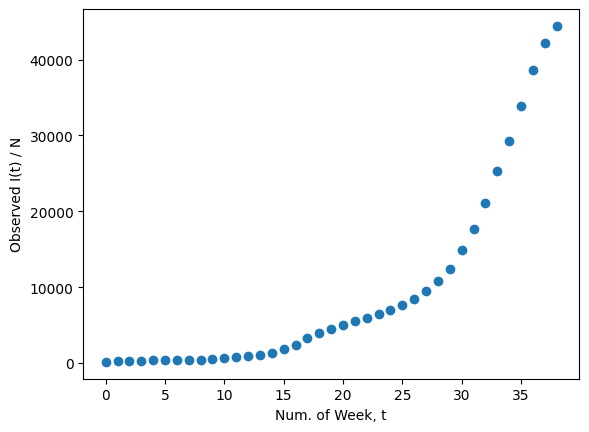

In [84]:
import matplotlib.pyplot as plt
state1 = state_cases.iloc[0, :]
y_total = state1.values
weekly_y_total = [sum(y_total[i:i+7]) / 7 for i in range(0, len(y_total), 7)]
x_total = range(0,39)

plt.figure()
plt.scatter(x_total, weekly_y_total)
plt.xlabel('Num. of Week, t')
plt.ylabel('Observed I(t) / N')

In [ ]:
lam, p, gamma = 3, 0.05, 1./14
beta = lam * p

In [97]:
state_cases.index[state_cases.index.get_loc(state_cases.index[0])]

'AK'

/usr/local/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[ 3.52474166e+00 -2.90602775e-01  3.52698323e+05]
3.5247416629672115


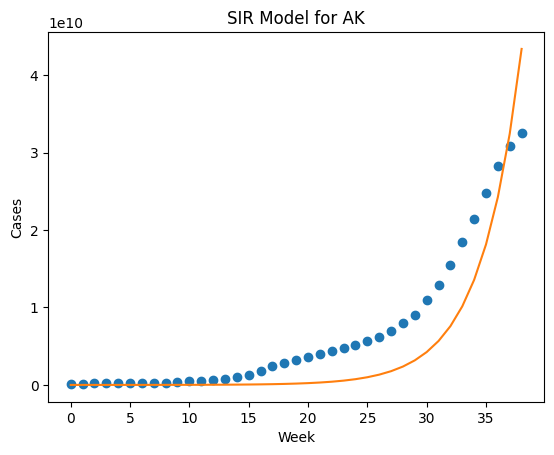

[ 4.64057254e+00 -1.74488178e-01  6.76737072e+06]
4.640572542607296


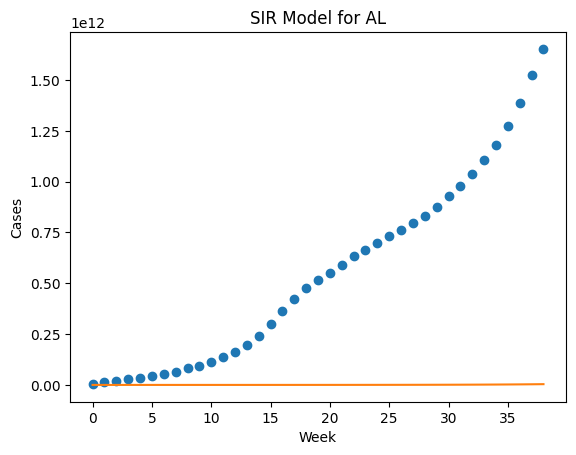

/var/folders/l2/8k3lyrk13tv35x2tjnmbkjb80000gn/T/ipykernel_97568/1227727809.py:3: RuntimeWarning: overflow encountered in scalar multiply
  dSdt = -beta * S * I / N
/var/folders/l2/8k3lyrk13tv35x2tjnmbkjb80000gn/T/ipykernel_97568/1227727809.py:4: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = beta * S * I / N - gamma * I
/var/folders/l2/8k3lyrk13tv35x2tjnmbkjb80000gn/T/ipykernel_97568/1227727809.py:5: RuntimeWarning: overflow encountered in scalar multiply
  dRdt = gamma * I


[ 3.70261295e+00 -2.12166071e-01  1.37456606e+06]
3.702612946551186


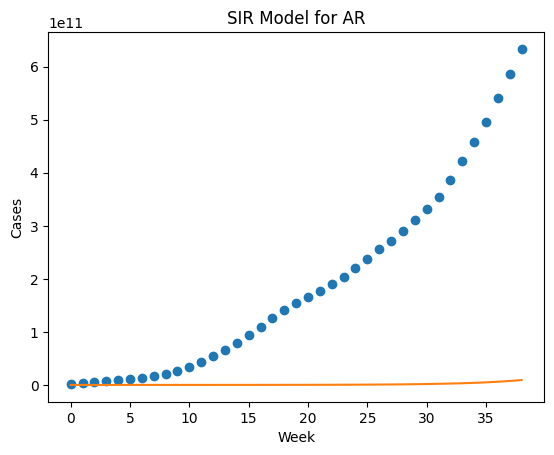

[ 1.57972381e+00 -1.08543443e-01  3.19032490e+06]
1.579723806228154


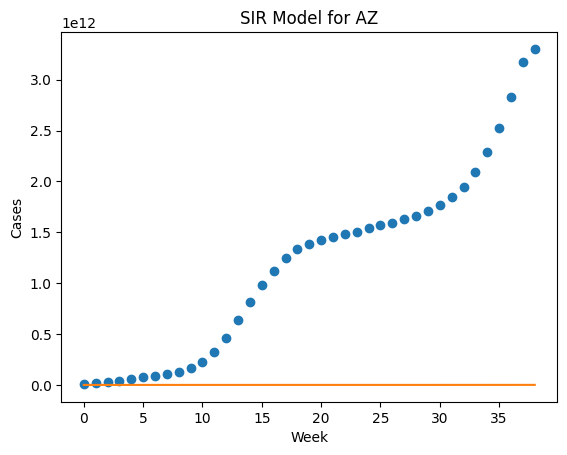

[ 1.70552511e+00 -8.25390837e-02  1.90778034e+07]
1.7055251104511582


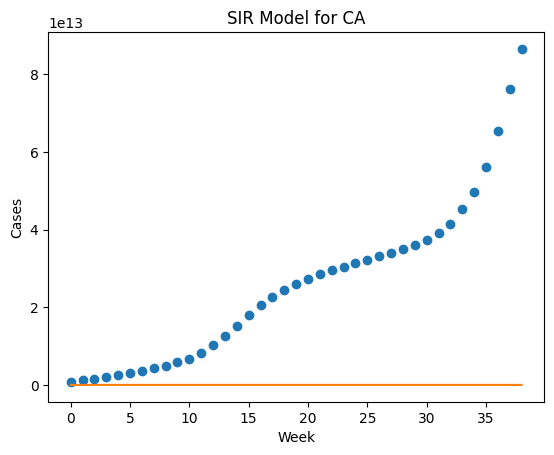

[ 9.65130345e-01 -1.00720914e-01  1.36545943e+06]
0.9651303450986222


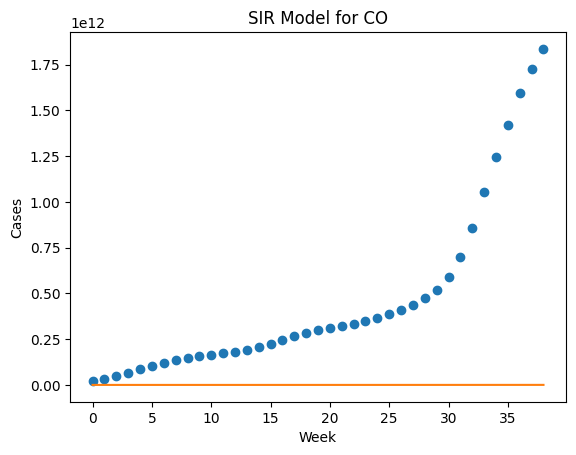

[ 6.11070142e-01 -3.16566288e-01  1.01393523e+07]
0.611070141599049


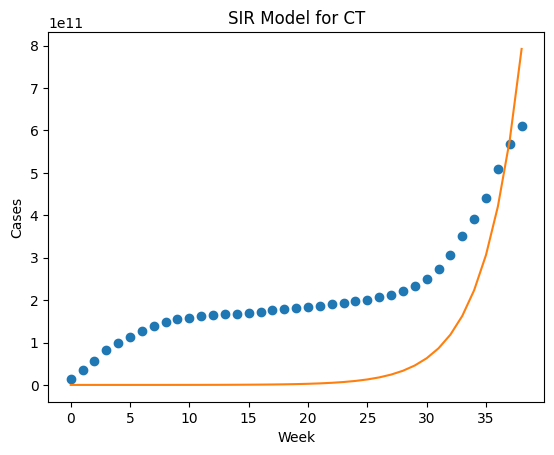

[ 1.61952206e+00 -1.17014890e-01  6.69584814e+04]
1.6195220630237341


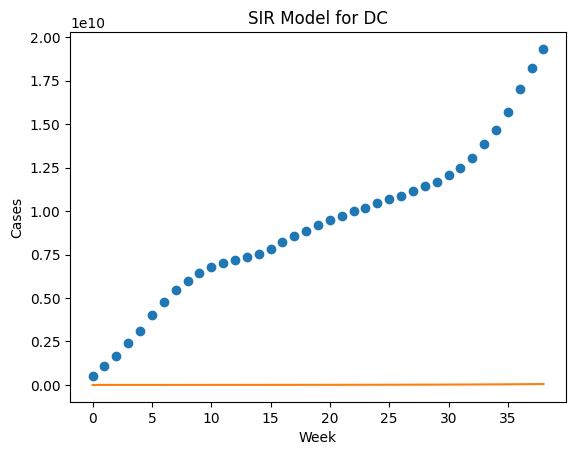

[ 1.83654461e+00 -2.35434054e-01  3.46164088e+05]
1.8365446088663282


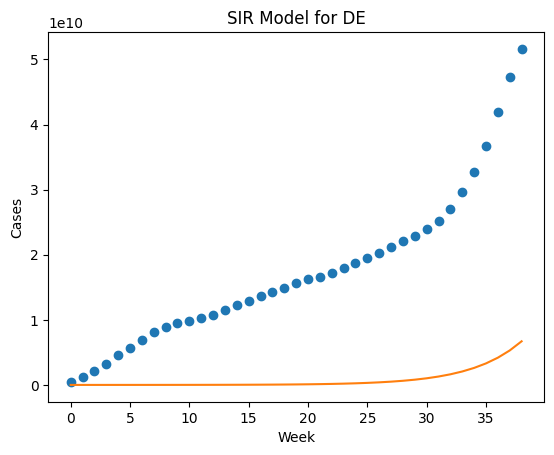

[ 1.65865725e+00 -1.43055960e-01  1.24239105e+07]
1.6586572533274075


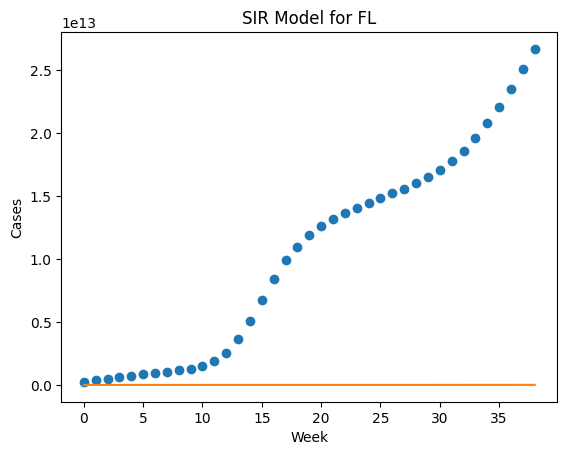

[ 1.40044787e+00 -1.12679569e-01  2.35123899e+06]
1.40044786787916


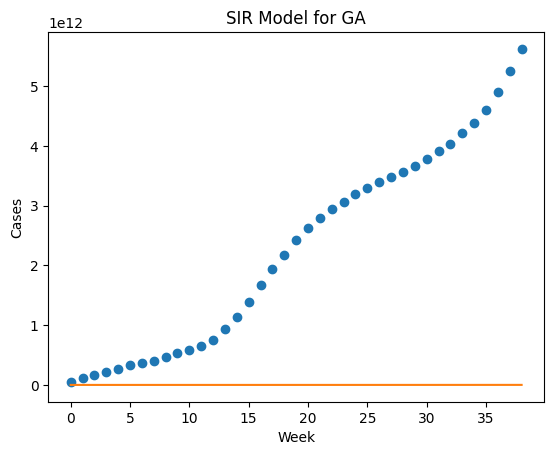

[ 1.50737867e+00 -2.72025632e-01  6.97384647e+05]
1.5073786683743886


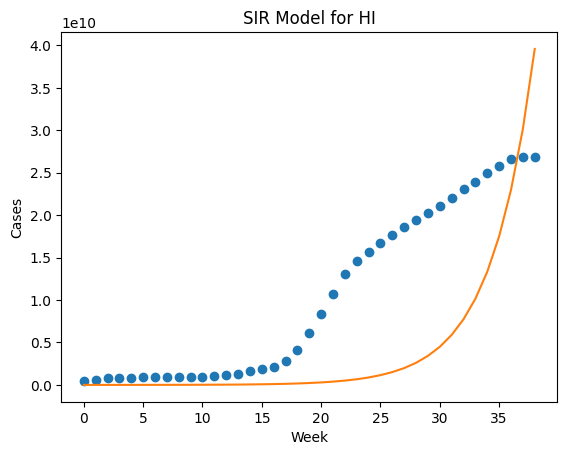

[ 1.82104935e+00 -1.09631664e-01  1.54235629e+06]
1.8210493482729173


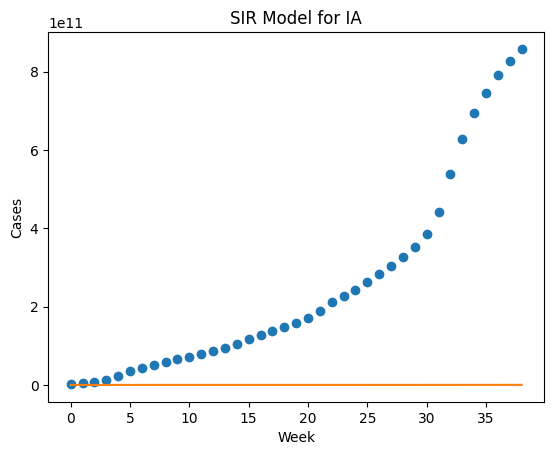

[ 2.47383057e+00 -2.66396978e-01  1.34589827e+04]
2.473830567336855


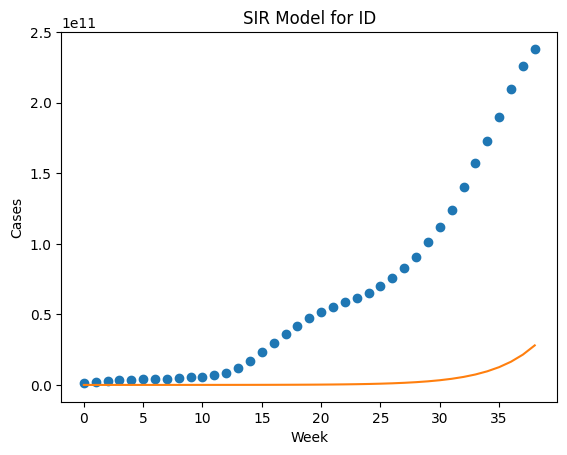

[ 5.26602436e-01 -1.51530766e-01  3.91387097e+07]
0.5266024358622702


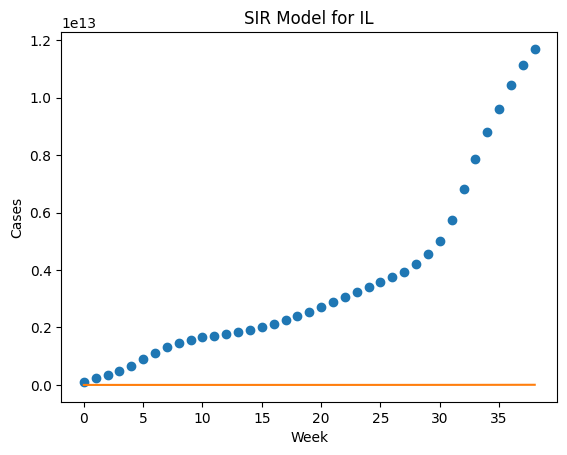

/var/folders/l2/8k3lyrk13tv35x2tjnmbkjb80000gn/T/ipykernel_97568/1227727809.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  dIdt = beta * S * I / N - gamma * I


[ 1.38683355e+00 -1.70800980e-01  1.68238838e+06]
1.386833549177972


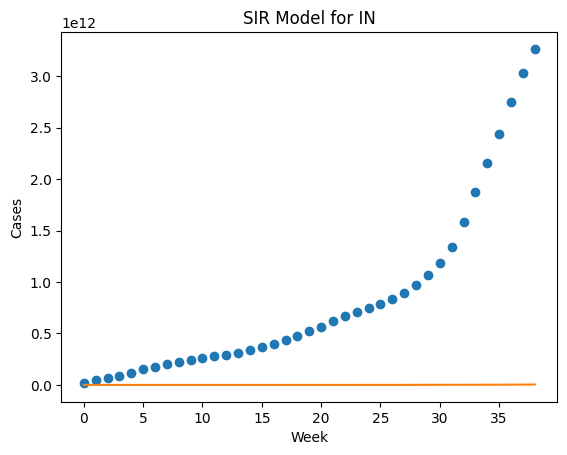

[ 1.49361583e+00 -1.68904018e-01  8.23738437e+05]
1.493615834521758


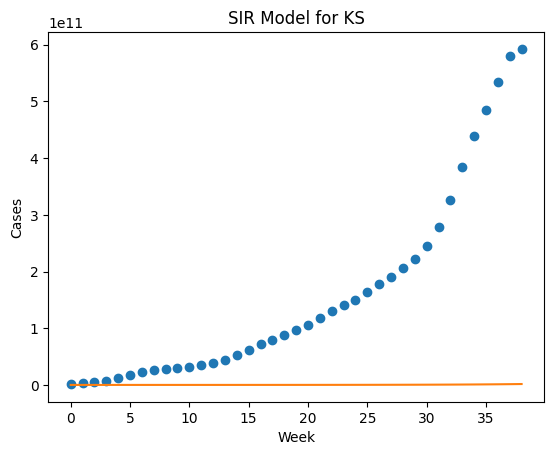

[ 9.71301481e-01 -1.07234209e-01  1.42541276e+06]
0.9713014806248256


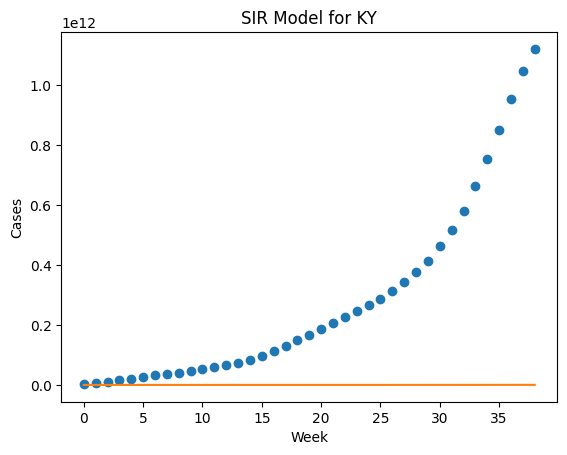

[ 2.61829133e+00 -3.40408853e-01  6.19151357e+06]
2.6182913251690754


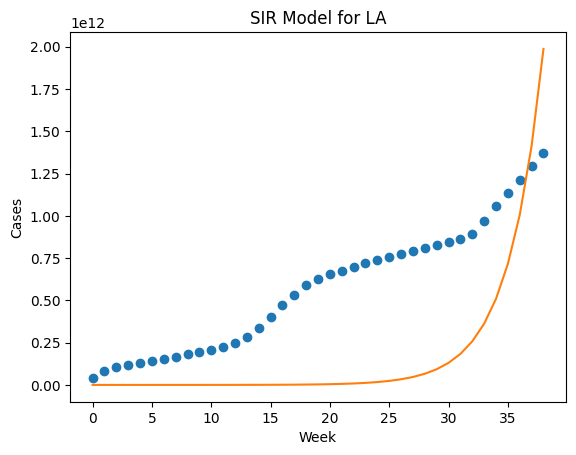

[ 1.60335544e+00 -2.59347923e-01  4.44305639e+06]
1.6033554410329307


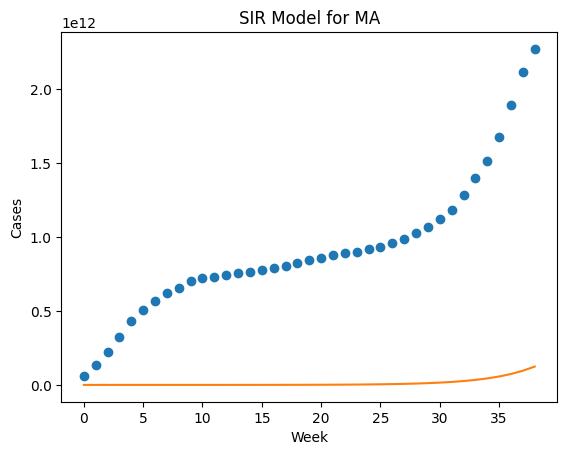

[ 1.71053671e+00 -1.98939799e-01  1.05254455e+06]
1.7105367059456096


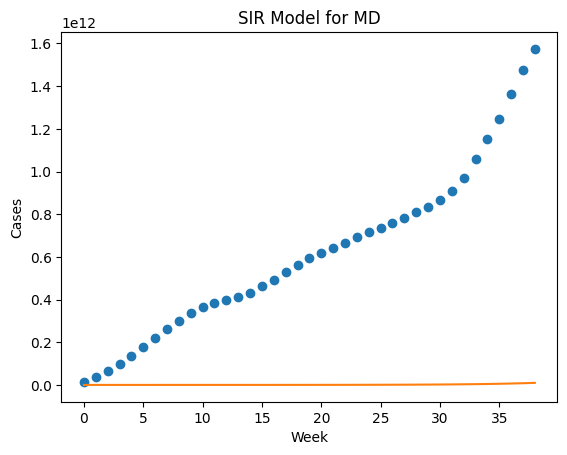

[ 6.04484007e-02 -1.66512386e-01  5.49943551e+06]
0.06044840070283564


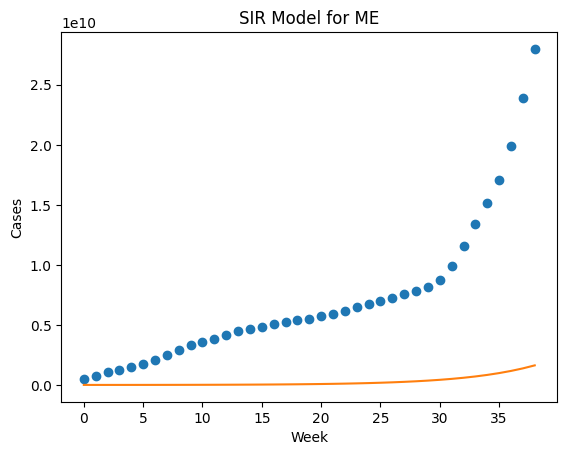

[ 1.53236501e+00 -2.46938602e-01  5.21222794e+06]
1.5323650079299143


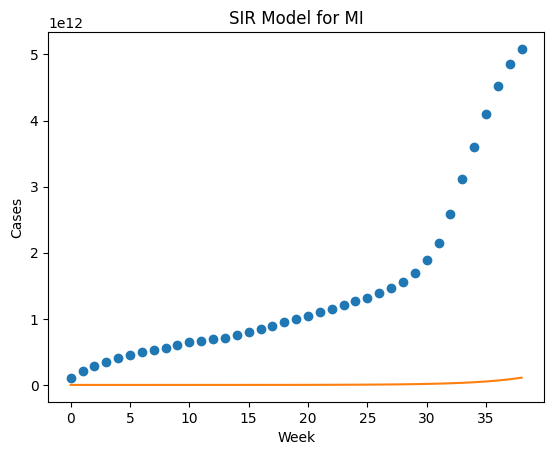

[ 1.07798542e+00 -2.77867821e-01  3.56729465e+06]
1.0779854164695546


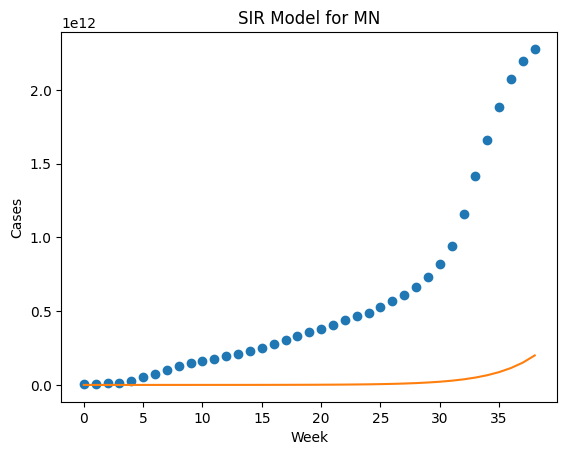

[ 1.22595359e+00 -1.75190485e-01  9.30002915e+05]
1.2259535921833207


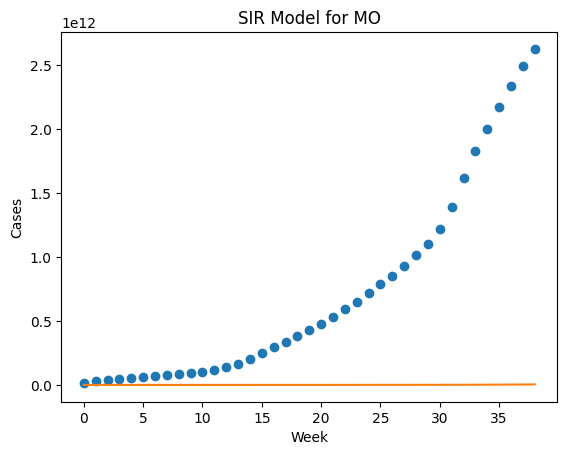

[ 2.95296109e+00 -1.49236654e-01  2.35693027e+06]
2.9529610888239652


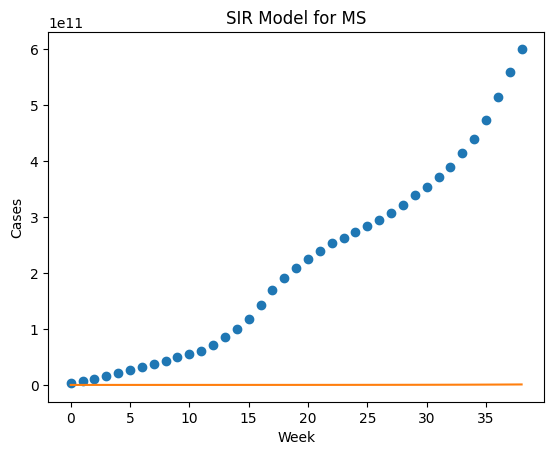

[ 2.61969009e+00 -3.03091930e-01  1.75758797e+06]
2.619690085716975


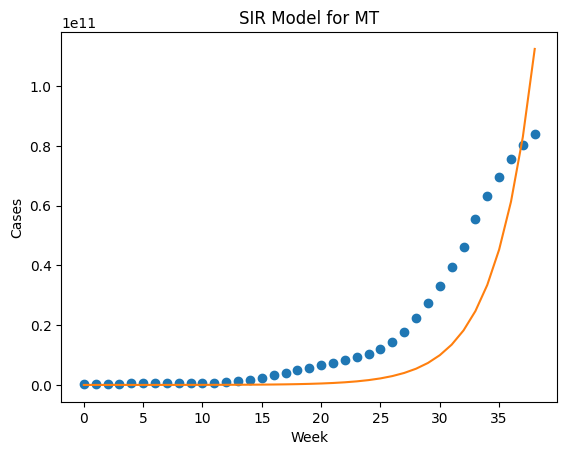

[ 1.85032554e+00 -1.41264883e-01  2.73597381e+06]
1.8503255426299514


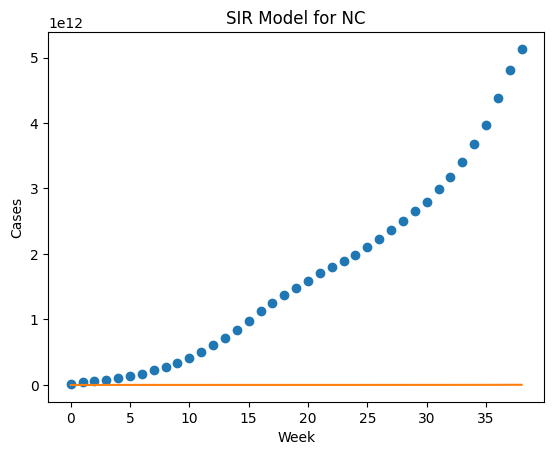

[ 2.21705278e+00 -3.03918007e-01  2.20717936e+05]
2.217052783898342


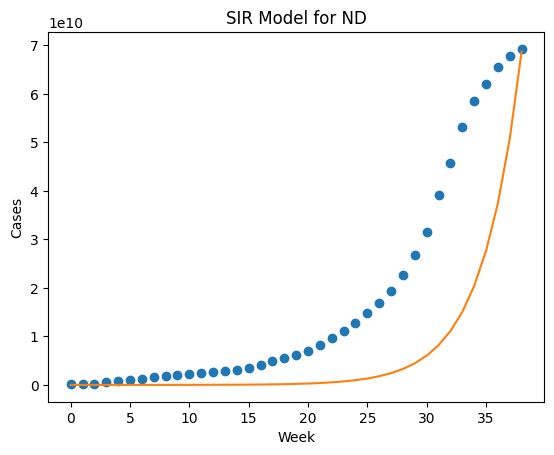

[ 2.01860334e+00 -1.93193088e-01  1.10561571e+06]
2.0186033413708033


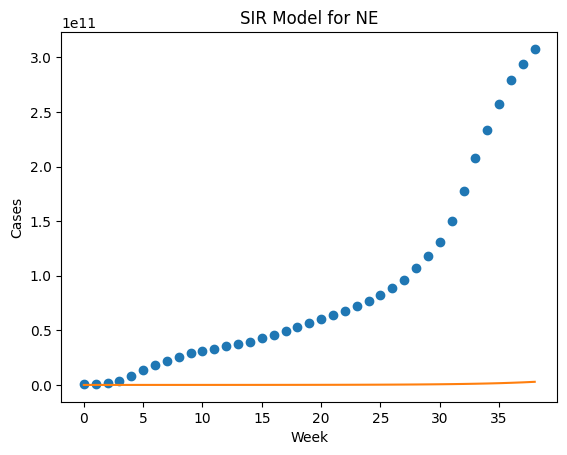

[ 2.10553810e+00 -2.97692059e-01  1.10558593e+04]
2.1055381042466714


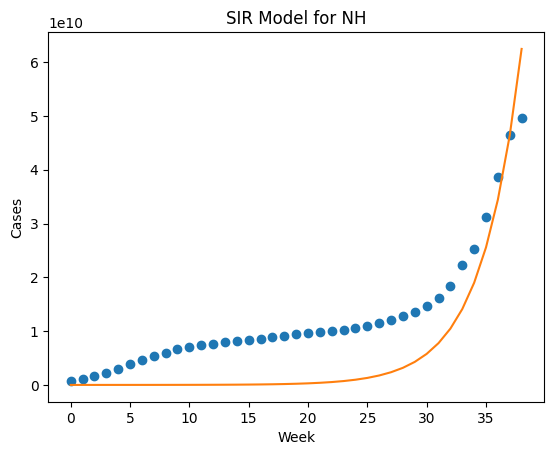

[ 3.47357144e+00 -1.91991056e-01  2.48684134e+06]
3.473571439663299


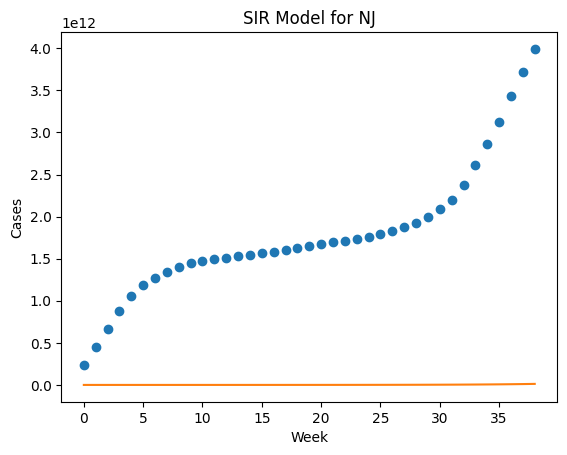

[ 1.34528614e+00 -8.13545724e-02  6.55680925e+05]
1.3452861375516392


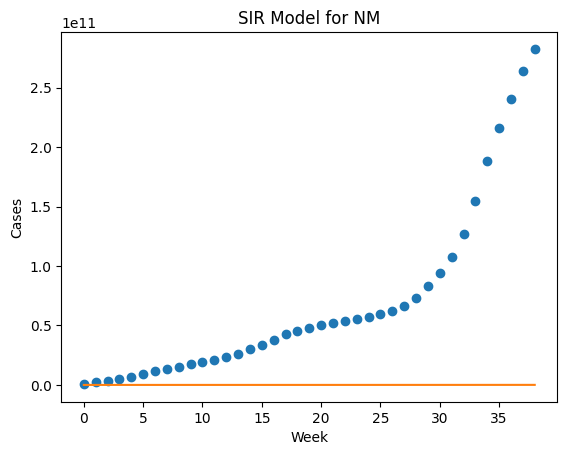

[ 2.34013227e+00 -1.18637647e-01  7.24458382e+05]
2.3401322721161835


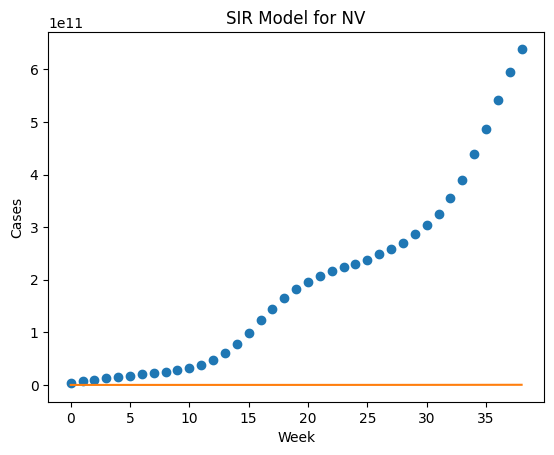

[ 6.91297656e-01 -3.64883341e-01  3.83501911e+07]
0.6912976559895248


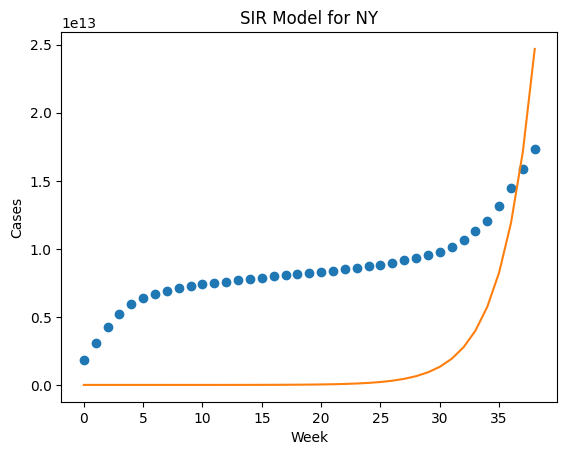

[ 2.11282600e+00 -1.02765152e-01  6.09625346e+06]
2.112825999711593


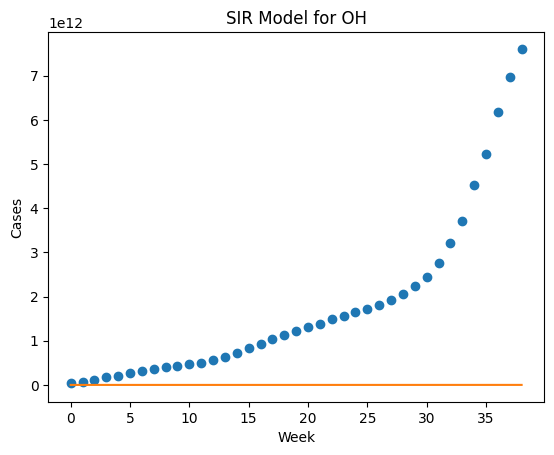

[ 4.81882722e+00 -2.11033870e-01  1.75048938e+06]
4.81882721814933


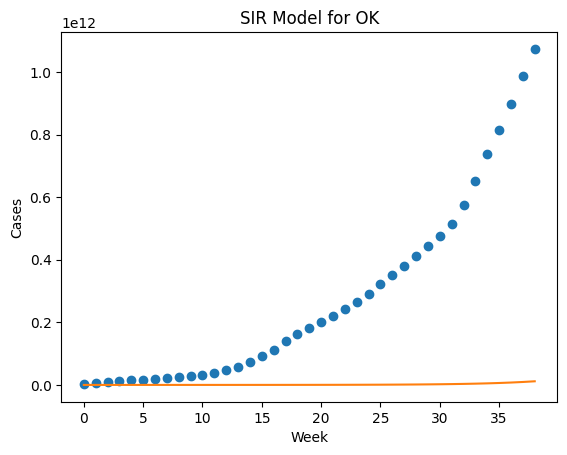

[ 3.97710605e+00 -2.10173237e-01  8.55186720e+05]
3.977106048727758


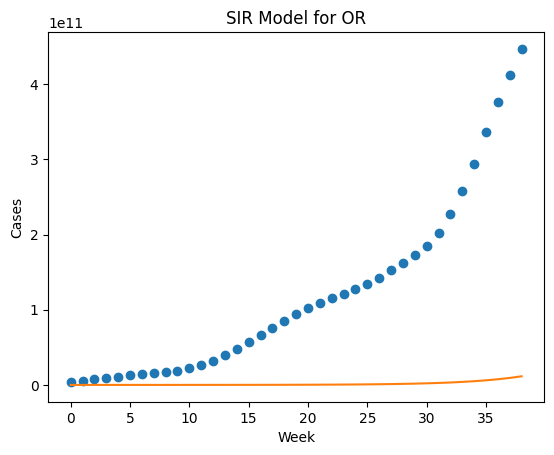

[ 2.22460930e+00 -3.56368771e-01  1.34826645e+07]
2.2246093024253524


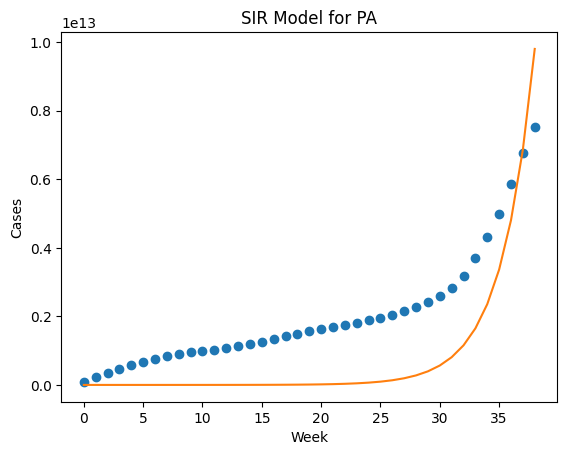

[ 1.26108024e+00 -2.91078615e-01  1.30937836e+07]
1.2610802384530186


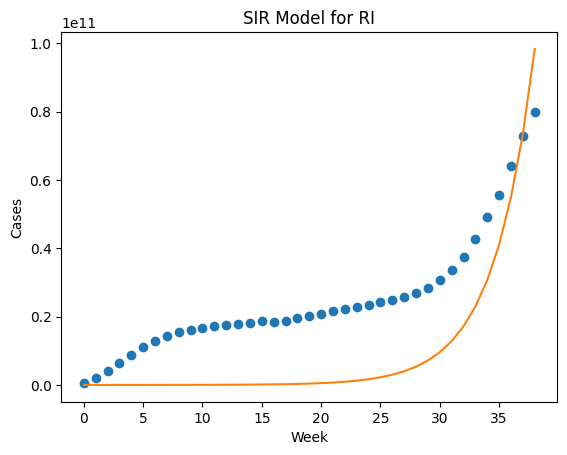

[ 3.45057263e+00 -1.84150646e-01  3.37579576e+06]
3.4505726260673297


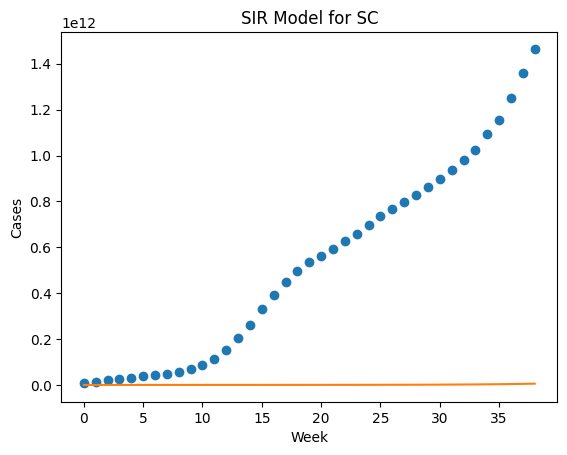

[ 3.09364306e+00 -3.19632078e-01  2.44585098e+04]
3.093643055219094


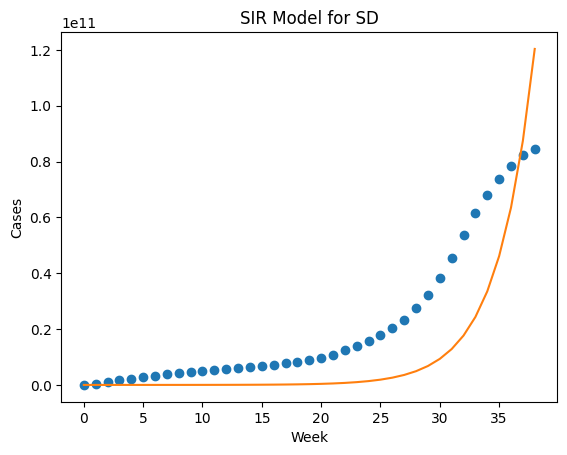

[ 2.81871388e+00 -2.77720314e-01  4.39840951e+06]
2.818713881006011


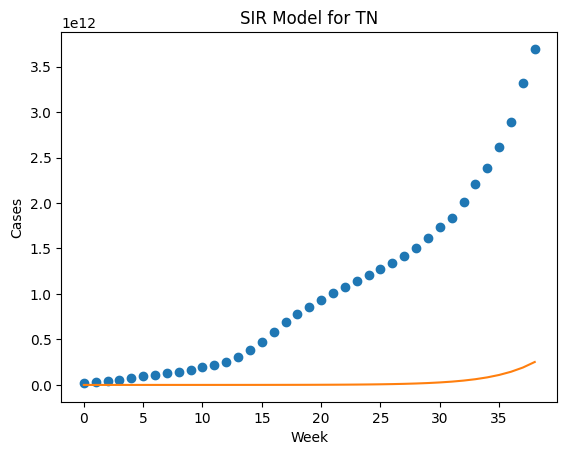

[ 2.23521377e+00 -1.21979127e-01  3.22838248e+06]
2.235213770473006


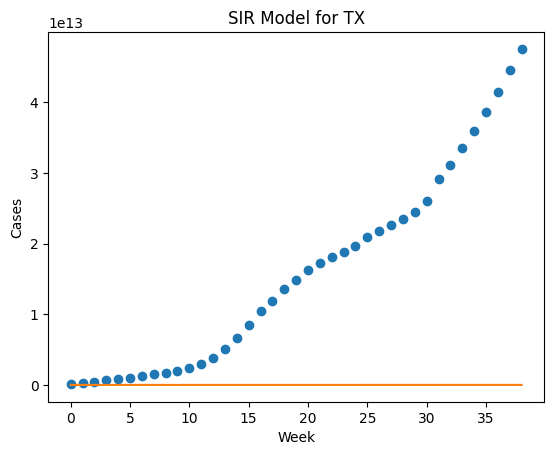

[ 6.58650858e+00 -2.49508461e-01  1.53181473e+06]
6.586508575475441


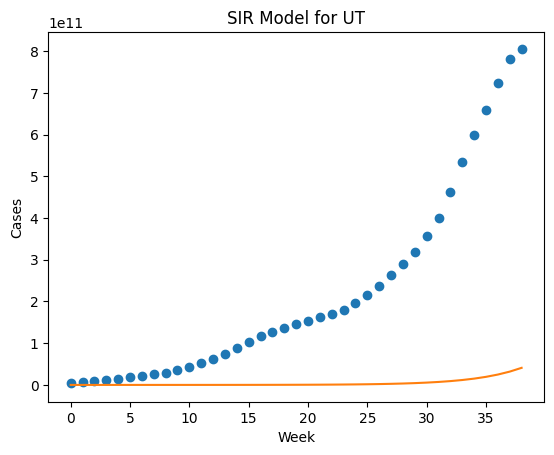

[ 1.78940654e+00 -1.71210149e-01  1.03666799e+06]
1.7894065438307922


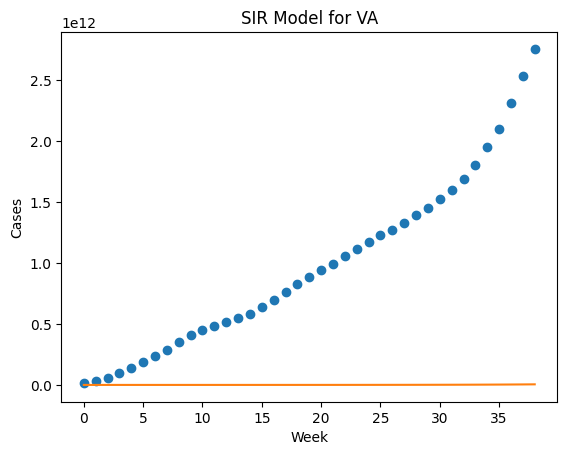

[ 1.29023709e+00 -8.93107366e-02  7.90442837e+04]
1.2902370925804636


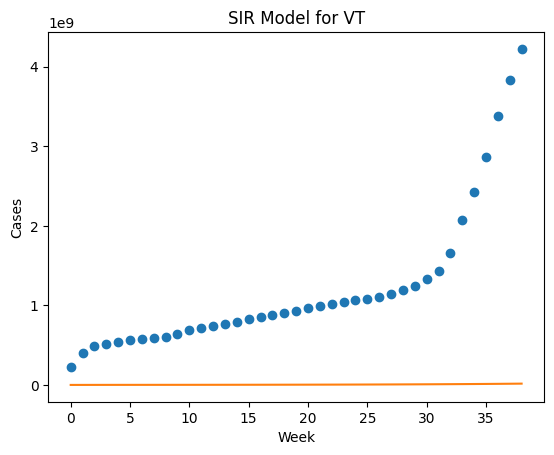

[ 7.33371889e+00 -1.71016724e-01  3.27836165e+06]
7.333718893241462


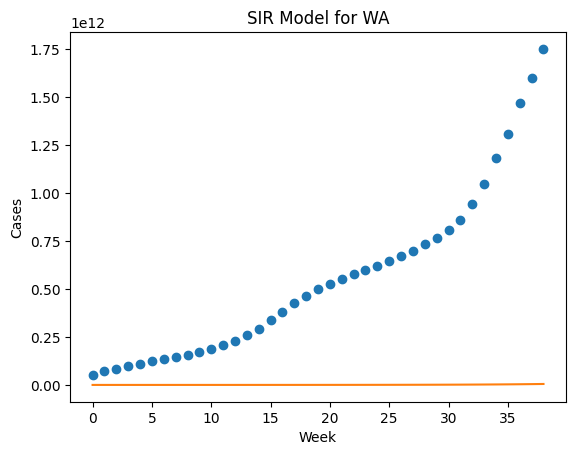

[ 8.21484412e+00 -2.23808112e-01  9.90261223e+05]
8.214844116458453


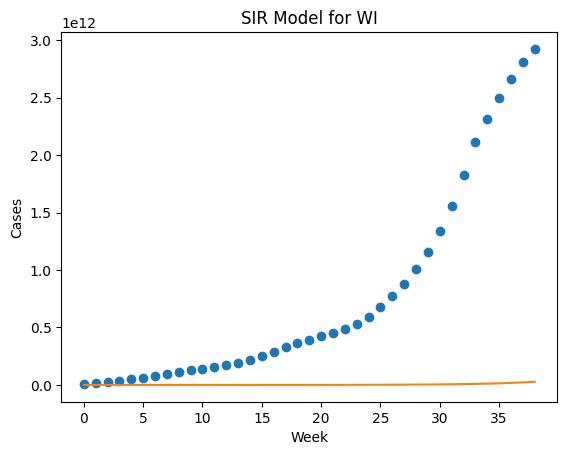

[ 1.71313544e+01 -1.91949805e-01  1.72982683e+04]
17.131354406416744


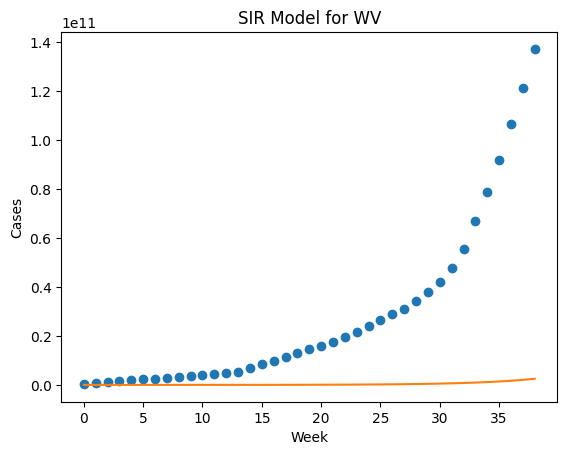

[ 1.07296171e+00 -2.86252518e-01  7.02536306e+05]
1.072961711302814


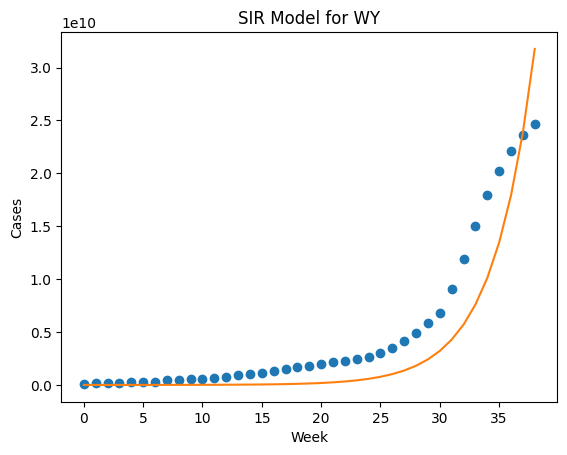

In [98]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def fit_odeint(x, beta, gamma, I0):
    S0 = N - I0
    R0 = 0
    return odeint(deriv, (S0, I0, R0), x, args=(N, beta, gamma))[:,1]

beta_values = {}
gamma_values = {}

for i in range(state_cases.shape[0]):
    state = state_cases.iloc[i, :]
    state_name = state_cases.index[state_cases.index.get_loc(state_cases.index[i])]
    N = population.values[i]
    y_total = state.values
    weekly_y_total = [sum(y_total[i:i+7]) / 7 for i in range(0, len(y_total), 7)]
    x_total = range(0,39)

    ydata = np.array(weekly_y_total, dtype=float) * N
    xdata = np.array(x_total, dtype=float)

    popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata,(0.3,1/14,0.05*N))
    print(popt)
    print(popt[0])
    beta_values[state_name] = popt[0]
    gamma_values[state_name] = popt[1]

    fitted = fit_odeint(xdata, *popt)
    plt.plot(xdata, ydata, 'o')
    plt.plot(xdata, fitted)
    plt.title(f"SIR Model for {state_name}")
    plt.xlabel("Week")
    plt.ylabel("Cases")
    plt.show()